In [13]:
import pandas as pd
data_directory = '../../../Data/PriorityPlacesData/'

In [14]:
scot_dz = pd.read_csv(data_directory + 'SG_DataZones_Centroids_2011.csv')
ew_lsoa = pd.read_csv(data_directory + 'Lower_layer_Super_Output_Areas_(December_2011)_Population_Weighted_Centroids_WGS.csv')
ni_soa = pd.read_csv(data_directory + 'NI_SOA_centroids.csv')
pp_data = pd.read_csv(data_directory + 'priority_places_v1_3_decile_domains.csv')

In [15]:
pp_data = pp_data.merge(ew_lsoa, left_on='geo_code', right_on='lsoa11cd', how='left')

In [16]:
pp_data = pp_data.merge(scot_dz, left_on='geo_code', right_on='DataZone', how='left')

In [17]:
pp_data = pp_data.merge(ni_soa, left_on='geo_code', right_on='SOA_CODE', how='left')

In [18]:
pp_data

,geo_code,domain_supermarket_proximity,domain_supermarket_accessibility,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,combined,longitude_x,...,Northing,geometry_x,longitude_y,latitude_y,Unnamed: 0,SOA_CODE,SOA_LABEL,geometry_y,lon,lat
0,E01003513,6,9,10,4,7,4,5,7,0.045915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E01003630,2,7,8,1,9,6,2,4,0.013900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E01003617,10,9,10,1,10,4,3,10,0.001566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E01003497,8,7,8,2,7,6,1,4,0.008449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E01003499,10,10,1,1,9,7,1,7,0.021817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42613,S01012412,1,1,3,8,1,10,2,7,NaN,...,1178351.0,POINT (-1.4491467846002373 60.48770860763861),-1.449147,60.487709,NaN,NaN,NaN,NaN,NaN,NaN
42614,S01012413,1,1,3,7,1,10,4,7,NaN,...,1190946.0,POINT (-1.0764065227271185 60.59873850832312),-1.076407,60.598739,NaN,NaN,NaN,NaN,NaN,NaN
42615,S01012414,1,1,2,6,1,10,4,6,NaN,...,1208851.0,POINT (-0.8600160172960023 60.75783837405527),-0.860016,60.757838,NaN,NaN,NaN,NaN,NaN,NaN
42616,S01012415,1,1,3,9,2,10,4,7,NaN,...,1162697.0,POINT (-1.0191864755818911 60.34468255208974),-1.019186,60.344683,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pp_data['longitude'] = pp_data['longitude_x'].fillna(pp_data['longitude_y'])
pp_data['latitude'] = pp_data['latitude_x'].fillna(pp_data['latitude_y'])
pp_data['longitude'] = pp_data['longitude'].fillna(pp_data['lon'])
pp_data['latitude'] = pp_data['latitude'].fillna(pp_data['lat'])

In [20]:
pp_data[['geo_code', 'longitude', 'latitude'] + pp_data.columns[pp_data.columns.str.startswith('domain')].tolist() + ['combined']]

,geo_code,longitude,latitude,domain_supermarket_proximity,domain_supermarket_accessibility,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,combined
0,E01003513,0.045915,51.513348,6,9,10,4,7,4,5,7
1,E01003630,0.013900,51.533718,2,7,8,1,9,6,2,4
2,E01003617,0.001566,51.545061,10,9,10,1,10,4,3,10
3,E01003497,0.008449,51.520488,8,7,8,2,7,6,1,4
4,E01003499,0.021817,51.523869,10,10,1,1,9,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...
42613,S01012412,-1.449147,60.487709,1,1,3,8,1,10,2,7
42614,S01012413,-1.076407,60.598739,1,1,3,7,1,10,4,7
42615,S01012414,-0.860016,60.757838,1,1,2,6,1,10,4,6
42616,S01012415,-1.019186,60.344683,1,1,3,9,2,10,4,7


In [21]:
pp_data = pp_data[['geo_code', 'longitude', 'latitude'] + pp_data.columns[pp_data.columns.str.startswith('domain')].tolist() + ['combined']]

In [22]:
pp_data.loc[:, pp_data.columns[pp_data.columns.str.startswith('domain')].tolist() + ['combined']] = pp_data[pp_data.columns[pp_data.columns.str.startswith('domain')].tolist() + ['combined']].astype(int)

/var/folders/zv/qv9ljngx5b90mpvpyh0pdsdh0000gn/T/ipykernel_2928/2904055064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_data.loc[:, pp_data.columns[pp_data.columns.str.startswith('domain')].tolist() + ['combined']] = pp_data[pp_data.columns[pp_data.columns.str.startswith('domain')].tolist() + ['combined']].astype(int)


<AxesSubplot:>

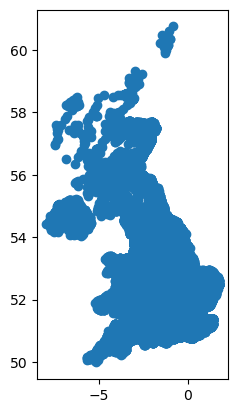

In [23]:
import geopandas as gpd

gpd.GeoDataFrame(pp_data, geometry = gpd.points_from_xy(pp_data['longitude'], pp_data['latitude']), crs=4326).plot()

In [24]:
pp_data.to_csv(data_directory + 'priority_places_v1_3_decile_domains_WGS.csv')